<h1> Generating & Testing AES Ciphers Blocks Using NIST Randomness Test Suite </h1>

<h2><center> Southern Methodist University: Masters of Data Science </center></h2> 
<h3><center> MSDS 7349: Data and Network Security - Final Project </center></h3>
<h4><center> Laurie Harris, Tim McWilliams, Jack Nelson </center></h4>

The folowing code is written with the purpose of randomly generating 128-bit AES ciphertext blocks with 128-bit keys and 128-bit plaintext.  These blocks will then run through various randomness tests in binary string form using the National Institute of Standards and Technology (NIST) Randomness Test Suite.  The inputs will vary throughout the program to test a series of scenarios.  These scenarios include randomly generating keys with a pseudorandom number generator while holding plaintext blocks constant, randomly generating plaintext blocks consistent with english letter frequency while holding keys constant, and randomly generating both keys and plaintext blocks simultaneously.  Ciphertext blocks in each scenario will be concatenated to produce a stream in which each NIST Randomness Test will be tested as the stream grows longer and longer.

<h3> Setup </h3>

Loading the packages and functions needed to run the program.

In [1]:
#import the necessary packages and functions
import os
from Crypto.Cipher import AES
from Crypto import Random
import random as rand
import subprocess
import matplotlib.pyplot as plt
import time
%matplotlib inline

A dictionary is created containing each letter in the alphabet that is assigned to a percentage the letter is used in the english language.<sup> [1] </sup>  This is done to minmic the same bias that would be seen in unencrypted message traffic over the internet in the US.  The percentages were taken to the precision of 0.000 and had to be right sized to intergers through multiplying them by 1000 for code functionality. 

In [2]:
#creating dictionary containing english letter frequencies
pos = {'a':8167, 'b':1492, 'c':2782, 'd':4253, 'e':12702, 'f':2228, 'g':2015, 'h':6094, 'i':6966,
       'j':153, 'k':772, 'l':4025, 'm':2406, 'n':6749, 'o':7507, 'p':1929, 'q':95, 'r':5987,
       's':6327, 't':9056, 'u':2758, 'v':978, 'w':2360, 'x':150, 'y':1974, 'z':74}

<h3> Methods for Study </h3>

<h4> Plaintext Block Generation </h4>

Each plaintext block will be created using a for loop to sample a letter in the dictionary at its appropriate frequency until the desired length of 128-bits is made.<sup>[2]</sup>  This would entail 16 characters assuming each letter is 1 byte (8-bits).  To show the length is 128-bits, we can convert each message to a hexadecimal (base 16 numeric notation) by first encoding it to the standard cp037 english format<sup>[3]</sup>. Afterwards, it is converted into its binary bit string and we take the length of the bit string, showing 128-bits.<sup>[4]</sup> 

In [3]:
def GetPlaintext():
    #initialize plaintext block
    plaintext = ""

    #run loop to sample 16 letters and append them to plaintext
    for i in range(16):
        plaintext += rand.choice([x for x in pos for y in range(pos[x])])

    #convert plaintext to hexadecimal then bit string that is padded for leading zeros
    plaintext_hex = plaintext.encode('cp037').hex()
    plaintext_bit = bin(int(plaintext_hex, 16))[2:].zfill(128)
    
    return plaintext, plaintext_hex, plaintext_bit

#run function and print results
plaintext = GetPlaintext()
print("plaintext:\n", plaintext[0])
print("\nplaintext_hex:\n", plaintext[1],"\nlength:\n",len(plaintext[1]))
print("\nplaintext_bit:\n", plaintext[2],"\nlength:\n",len(plaintext[2]))

plaintext:
 rrbrrogtnsolrlte

plaintext_hex:
 99998299999687a395a296939993a385 
length:
 32

plaintext_bit:
 10011001100110011000001010011001100110011001011010000111101000111001010110100010100101101001001110011001100100111010001110000101 
length:
 128


<h4> Key Generation </h4>

Each key will be generated using os.urandom() function, a pseudorandom number generator (PRNG) that uses entropy sources from within a machine's operating system to generate bits that are then outputted in a byte literal format.<sup>[5]</sup>  Again, 16 byte literals are generated to produce 128-bits.  To show the length is 128-bits, we will convert byte literals to a hexadecimal and then into its binary string.  At which point, we will take the length of the bit string.

In [4]:
def GetKey():
    #generate random key using os.urandom() PRNG
    key = os.urandom(16)

    #convert key to hexadecimal then bit string that is padded for leading zeros
    key_hex = key.hex()
    key_bit = bin(int(key_hex, 16))[2:].zfill(128)

    return key, key_hex, key_bit

#run function and print results
key = GetKey()    
print("key:\n", key[0])
print("\nkey_hex:\n", key[1],"\nlength:\n",len(key[1]))
print("\nkey_bit:\n", key[2],"\nlength:\n",len(key[2]))

key:
 b'[\x08\xaa\x0f&\x93\xe0\xdc\x93\xa9$!\xff\xc0\xed5'

key_hex:
 5b08aa0f2693e0dc93a92421ffc0ed35 
length:
 32

key_bit:
 01011011000010001010101000001111001001101001001111100000110111001001001110101001001001000010000111111111110000001110110100110101 
length:
 128


<h4> Ciphertext Block Generation </h4>

PyCrypto is an open source package available for Python which makes use of many common cryptographic ciphers along with many other security related functions.  We will be using the function Cipher.AES() within the PyCrypto package to generate 128-bit ciphertext blocks.<sup>[6]</sup>  This function is consistent with the Advanced Encryption Standard (AES) as noted in FIPS 197.<sup>[7]</sup>  An AES() object will be made using the randomly generated 128-bit key and then will be used to encrypt our 128-bit plaintext blocks into 128-bit ciphertext blocks.  All AES() objects will be made using Electronic Codebook (ECB) mode, the default mode when making an AES() object in PyCrypto.  To show the length of the ciphertext is 128-bits, we will convert the byte literal output from our encrypt function to a hexadecimal and then into its binary string.  At which point, we will take the length of the bit string. 

In [5]:
def GetCiphertext(plaintext,key):
    #generate AES cipher object with 128-bit key
    cipher = AES.new(key)

    #encrypt plaintext with AES cipher object
    ciphertext = cipher.encrypt(plaintext)

    #convert key to hexadecimal then bit string that is padded for leading zeros
    ciphertext_hex = ciphertext.hex()
    ciphertext_bit = bin(int(ciphertext_hex, 16))[2:].zfill(128)
    
    return ciphertext, ciphertext_hex, ciphertext_bit

#run function and print results
ciphertext = GetCiphertext(plaintext[0],key[0])
print("ciphertext:\n", ciphertext[0])
print("\nkey_hex:\n", ciphertext[1],"\nlength:\n",len(ciphertext[1]))
print("\nkey_bit:\n", ciphertext[2],"\nlength:\n",len(ciphertext[2]))

ciphertext:
 b'\xb4 u\x1e\x9ay\xf6\x84\xdetBP+\xbe&\xfe'

key_hex:
 b420751e9a79f684de7442502bbe26fe 
length:
 32

key_bit:
 10110100001000000111010100011110100110100111100111110110100001001101111001110100010000100101000000101011101111100010011011111110 
length:
 128


<h3> Data Input </h3>

<h4> Plaintext Blocks & Keys </h4>  

To begin, we will randomly sample 1,000 128-bit plaintext blocks and 1,000 128-bit keys using the methods listed above.  This is simply the code functions defined above but looped 1,000 times to create a bank of 1,000 plaintext blocks and 1,000 keys to be used for analysis. 

In [10]:
def StatusBar(i,n):
    #print status of loop
    percent = int(i/n*100)
    status = '|'+('='*percent)+(' '*(100-percent))+'| '+str(percent)+'% Complete'
    print(status, end='\r')

def GenerateInputBlocks(n):
    #initialize input banks
    plaintext_bank = [0]*n
    key_bank = [0]*n
    
    #loop to generate input banks
    for i in range(n):
        plaintext_bank[i] = GetPlaintext()[0]        
        key_bank[i] = GetKey()[0]
        
        StatusBar(i,n)
    print('|'+'='*100+'|100% Complete', end='\r')
    
    return plaintext_bank, key_bank

#run function
plaintext_bank, key_bank = GenerateInputBlocks(1000)        

|=================================================================================================== | 99% Complete

<h3> Data Output </h3>

<h4> Ciphertext Blocks </h4>

Three separate scenarios will be tested for randomness: variable plaintext blocks with a constant key, variable keys with a constant plaintext block, and variable plaintext blocks with variable keys.  These three test iterations will allow us to individually analyze how each input affects the AES cipher.  A single function with various options can accomplish this by indicating if the plaintext or key is 'variable' or 'constant'.

In [13]:
def GenerateOutputBlocks(plaintext_bank, key_bank, gen_plaintext='variable', gen_key='variable'):  
    #initialize ciphertext, bank of individual ciphertext blocks and bank of appended ciphertext blocks
    ciphertext_bank_stream = [0]*len(plaintext_bank)
    ciphertext_stream = ''
    
    #loop to generate output banks
    for i in range(len(plaintext_bank)):
        #assign plaintext and key variables according to their perspective options
        #'variable' = new input block with each iteration 'constant' = same input block with each iteration
        plaintext = plaintext_bank[i] if gen_plaintext == 'variable' else plaintext_bank[0]
        key = key_bank[i] if gen_key == 'variable' else key_bank[0]
        
        #add ciphertext block to stream and save in ciphertext bank
        ciphertext_stream += GetCiphertext(plaintext,key)[2]
        ciphertext_bank_stream[i] = ciphertext_stream
    
    return ciphertext_bank_stream

A bank of ciphertext streams after each encrypted block is saved for each of the three scenarios.  An abbreviation is placed at the end of each bank to identify which is which:  
 - ciphertext_bank_stream_CK: constant key, variable plaintext
 - ciphertext_bank_stream_CP: variable key, constant plaintext
 - cipehrtext_bank_stream_RR: variable key, variable plaintext

In [14]:
ciphertext_bank_stream_CK = GenerateOutputBlocks(plaintext_bank, key_bank, gen_key='constant')

In [15]:
ciphertext_bank_stream_CP = GenerateOutputBlocks(plaintext_bank, key_bank, gen_plaintext='constant')

In [16]:
ciphertext_bank_stream_RR = GenerateOutputBlocks(plaintext_bank, key_bank)

<h3> National Institute of Standards and Technology (NIST) Randomness Test Suite <h3>

<h4> Introduction </h4>  

NIST defines 15 separate tests that can be used to test randomness.  The test themselves cannot determine if a sequence is random but only if it is non-random.  The determination is made based on the output value of each test (p-value), which is a statistical confidence on the non-randomness of the sequence.  The threshold defined by NIST for a non-random sequence in a test is $<$0.01<sup>[8]</sup> but that should not be exclude further investigating output p-values that are close to 0.01.  Randomness tests are to be used as a foundation, building the case that a sequence is random by proving it is not non-random.  It may seem like only a difference in Semantics but the tidious nature of the claim is imparative as it implies completely different meanings.

<h4> Python Application </h4>  

Through research we were able to uncover a 3rd party generated application of the NIST Randomness Test Suite<sup>[9]</sup>.  The program was written in Python 2.  Using the functions and structure of this 3rd party program rather than the Test Suite supplied by NIST allowed our research to be more versatile.  Inputs were able to be altered quickly since everything was done on a single platform.  

The 3rd party application in its entirety was validated prior to reusing its functions within this notebook.  Minor edits were made to convert functionality from Python 2 to Python 3 and small deviations were carried out to the function execution scheme tailoring it specifically to this research.   

<h4> Initial Setup </h4>  

A series of functions and packages are carried out in the beginning of the 3rd party program.  These functions are reused throughout the course of each NIST Randomness Test.  Throughout each test section in this notebook, there are also a series of defined functions prior to the actual NIST Randomness Test function, however, these are specific to that test.

In [18]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

import numpy as np
import scipy.special as spc
import scipy.fftpack as sff
import scipy.stats as sst
import functools

def sumi(x): return 2 * x - 1
def su(x, y): return x + y
def sus(x): return (x - 0.5) ** 2
def sq(x): return int(x) ** 2
def logo(x): return x * np.log(x)

def pr(u, x):
    if u == 0:
        out=1.0 * np.exp(-x)
    else:
        out=1.0 * x * np.exp(2*-x) * (2**-u) * spc.hyp1f1(u + 1, 2, x)
    return out

def stringpart(binin, num):
    blocks = [binin[xs * num:num + xs * num:] for xs in range(int(len(binin) / num))]
    return blocks

def randgen(num):
    '''Spits out a stream of random numbers like '1001001' with the length num'''

    rn = open('/dev/urandom', 'r')
    random_chars = rn.read(num / 2)
    stream = ''
    for char in random_chars:
        c = ord(char)
        for i in range(0, 2):
            stream += str(c >> i & 1)
    return stream

<h4> NIST Randomness Test 1: Frequency (Monobit) Test </h4>  

This is a simple test where the frequency of ones and zeros in the sequence are tested to see if one value (either one or zero) is more frequent than the other.  The p-value is based on if the frequency of one value is significantly different than one half of the total length of the sequence.  

The function for the test only takes the bit string as an input.

In [19]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def monobitfrequencytest(binin):
    ''' The focus of the test is the proportion of zeroes and ones for the entire sequence. The purpose of this 
    test is to determine whether that number of ones and zeros in a sequence are approximately the same as would 
    be expected for a truly random sequence. The test assesses the closeness of the fraction of ones to 1/2, that 
    is, the number of ones and zeroes in a sequence should be about the same.'''
    ss = [int(el) for el in binin]
    sc = list(map(sumi, ss))
    sn = functools.reduce(su, sc)
    sobs = np.abs(sn) / np.sqrt(len(binin))
    pval = spc.erfc(sobs / np.sqrt(2))
    return pval

In [285]:
#validating function
epsilon = '1100100100001111110110101010001000100001011010001100001000110100110001001100011001100010100010111000'
monobitfrequencytest(epsilon)

0.109598583399116

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.1.8 

<h4> NIST Randomness Test 2: Frequency Test within a Block </h4>  

NIST Randomness Test 2 is very similar to the previous frequency test, however in this test we testing frequency within a specified M-bit block.  Notice that is M=1 this would be equivalent to the monobit frequency test.  Again, a p-value signifies how significantly different the frequency is than what is expected in a random sequence, non-random equalling a lower p-value.  

The function takes two inputs, the bit string and M-bit block size.  Since we are generating 128-bit blocks at a time, that is the M value we have specified in the function.

In [22]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def blockfrequencytest(binin, nu=128):
    ''' The focus of the test is the proportion of zeroes and ones within M-bit blocks. The purpose of this test 
    is to determine whether the frequency of ones is an M-bit block is approximately M/2.'''
    ss = [int(el) for el in binin]
    tt = [1.0 * sum(ss[xs * nu:nu + xs * nu:]) / nu for xs in range(int(len(ss) / nu))]
    uu = list(map(sus, tt))
    chisqr = 4 * nu * functools.reduce(su, uu)
    pval = spc.gammaincc(len(tt) / 2.0, chisqr / 2.0)
    return pval

In [287]:
#validating function
blockfrequencytest(epsilon, nu=10)

0.70643844964128077

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.2.8 

<h4> NIST Randomness Test 3: Runs Test </h4>  

The runs test counts the total number of runs in a sequence, a run being a consecutive string of ones or zeros, and compares the number to that which would be expected in a random sequence.  In essence, a small p-value represents non-randomness where a sequence is switching between ones and zeros too fast (too many total runs) or too slow (not enough total runs).  

The function take a single input, the bit string.

In [34]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def runstest(binin):
    ''' The focus of this test is the total number of zero and one runs in the entire sequence, where a run is an 
    uninterrupted sequence of identical bits. A run of length k means that a run consists of exactly k identical 
    bits and is bounded before and after with a bit of the opposite value. The purpose of the runs test is to 
    determine whether the number of runs of ones and zeros of various lengths is as expected for a random sequence. 
    In particular, this test determines whether the oscillation between such substrings is too fast or too slow.''' 
    ss = [int(el) for el in binin]
    n = len(binin)
    pi = 1.0 * functools.reduce(su, ss) / n
    vobs = len(binin.replace('0', ' ').split()) + len(binin.replace('1' , ' ').split())
    pval = spc.erfc(abs(vobs-2*n*pi*(1-pi)) / (2 * pi * (1 - pi) * np.sqrt(2*n)))
    return pval

In [288]:
#validating function
runstest(epsilon)

0.50079791788709027

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.3.8 

<h4> NIST Randomness Test 4: Test for the Longest Run of Ones in a Block </h4>

Again, as with NIST Randomness Tests 1 & 2, NIST Randomness Test 4 is similar to 3 however, a M-bit block size breaks the sequence up for each block to have its own test.  Rather than a runs test on each M-bit block, this test only determines if the longest run of ones within an M-bit block is non-random.  The test only specifies runs of ones but notice that since there is only 2 potential values for a bit.  A non-random run length of ones would result in a non-random run length of zeros.  

The function itself only takes one input, the bit string.  A length is taken of the bit string to determine the M-bit block size value in accordance with NIST recommendations.

In [37]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def longestrunones8(binin):
    ''' The focus of the test is the longest run of ones within M-bit blocks. The purpose of this test is to 
    determine whether the length of the longest run of ones within the tested sequence is consistent with the 
    length of the longest run of ones that would be expected in a random sequence. Note that an irregularity in 
    the expected length of the longest run of ones implies that there is also an irregularity in the expected 
    length of the longest run of zeroes. Long runs of zeroes were not evaluated separately due to a concern about 
    statistical independence among the tests.'''
    m = 8
    k = 3
    pik = [0.2148, 0.3672, 0.2305, 0.1875]
    blocks = [binin[xs*m:m+xs*m:] for xs in range(int(len(binin) / m))]
    n = len(blocks)
    counts1 = [xs+'01' for xs in blocks] # append the string 01 to guarantee the length of 1
    counts = [xs.replace('0',' ').split() for xs in counts1] # split into all parts
    counts2 = [list(map(len, xx)) for xx in counts]
    counts4 = [(4 if xx > 4 else xx) for xx in list(map(max,counts2))]
    freqs = [counts4.count(spi) for spi in [1, 2, 3, 4]]
    chisqr1 = [(freqs[xx]-n*pik[xx])**2/(n*pik[xx]) for xx in range(4)]
    chisqr = functools.reduce(su, chisqr1)
    pval = spc.gammaincc(k / 2.0, chisqr / 2.0)
        
    return pval

def longestrunones128(binin):  # not well tested yet
    m = 128
    k = 5
    n = len(binin)
    pik = [ 0.1174, 0.2430, 0.2493, 0.1752, 0.1027, 0.1124 ]
    blocks = [binin[xs * m:m + xs * m:] for xs in range(int(len(binin) / m))]
    n = len(blocks)
    counts = [xs.replace('0', ' ').split() for xs in blocks]
    counts2 = [list(map(len, xx)) for xx in counts]
    counts3 = [(4 if xx < 5 else xx) for xx in list(map(max, counts2))]
    counts4 = [(9 if xx > 9 else xx) for xx in counts3]
    freqs = [counts4.count(spi) for spi in [4, 5, 6, 7, 8, 9]]
    chisqr1 = [(freqs[xx] - n * pik[xx]) ** 2 / (n * pik[xx]) for xx in range(len(freqs))]
    chisqr = functools.reduce(su, chisqr1)
    pval = spc.gammaincc(k / 2.0, chisqr / 2.0)
        
    return pval

def longestrunones10000(binin):  # not well tested yet
    m = 10000
    k = 6
    pik = [0.0882, 0.2092, 0.2483, 0.1933, 0.1208, 0.0675, 0.0727]
    blocks = [binin[xs * m:m + xs * m:] for xs in range(int(len(binin) / m))]
    n = len(blocks)
    counts = [xs.replace('0', ' ').split() for xs in blocks]
    counts2 = [list(map(len, xx)) for xx in counts]
    counts3 = [(10 if xx < 11 else xx) for xx in list(map(max, counts2))]
    counts4 = [(16 if xx > 16 else xx) for xx in counts3]
    freqs = [counts4.count(spi) for spi in [10,11,12,13,14,15,16]]
    chisqr1 = [(freqs[xx] - n * pik[xx]) ** 2 / (n * pik[xx]) for xx in range(len(freqs))]
    chisqr = functools.reduce(su, chisqr1)
    pval = spc.gammaincc(k / 2.0, chisqr / 2.0)

    return pval

def longestrunones(binin):
    if len(binin) > 749999:
        pval = longestrunones10000(binin)
    elif len(binin) > 6271:
        pval = longestrunones128(binin)
    elif len(binin) > 127:
        pval = longestrunones8(binin)
    else:
        print('longestrunones failed, too few bits:', len(binin))
        pval = 0
    return pval

In [290]:
#validating function
epsilon = '11001100000101010110110001001100111000000000001001001101010100010001001111010110100000001101011111001100111001101101100010110010'
longestrunones(epsilon)

0.18059797678555792

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.4.8 

<h4> NIST Randomness Test 5: Binary Matrix Rank Test </h4>  

NIST Randomness Test 5 tests a sequence for linear dependence based on a predefined substring length within the sequence.  This is done by placing the substrings of the sequence into matrices and determining the rank of the matrices.  

The function for the test takes three inputs: the bit string, the number of rows in each matrix (m), and the number columns in each matrix (q).  NIST preset the values for m and q to be 32.  However, for our research, we changed m and q to be 16.  16x16 = 256, therefore, one matrix would consist of two 128-bit blocks.  The thought process was to minimize matrices as closely as we can to 128-bits since that is the block size in which we are generating ciphertext.

In [527]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def mrank(matrix): # matrix rank as defined in the NIST specification
    m=len(matrix)
    leni=len(matrix[0])
    def proc(mat):
        for i in range(m):
            if mat[i][i]==0:
                for j in range(i+1,m):
                    if mat[j][i]==1:
                        mat[j],mat[i]=mat[i],mat[j]
                        break
            if mat[i][i]==1:
                for j in range(i+1,m):
                    if mat[j][i]==1: mat[j]=[mat[i][x]^mat[j][x] for x in range(leni)]
        return mat
    maa=proc(matrix)
    maa.reverse()
    mu=[i[::-1] for i in maa]
    muu=proc(mu)
    ra=np.sum(np.sign([xx.sum() for xx in np.array(mu)]))
    return ra

def binarymatrixranktest(binin,m=32,q=32):
    ''' The focus of the test is the rank of disjoint sub-matrices of the entire sequence. The purpose of this test is to check for linear dependence among fixed length substrings of the original sequence.'''
    p1 = 1.0
    for x in range(1,50): p1*=1-(1.0/(2**x))
    p2 = 2*p1
    p3 = 1-p1-p2;
    n=len(binin)
    u=[int(el) for el in binin] # the input string as numbers, to generate the dot product 
    f1a = [u[xs*m:xs*m+m:] for xs in range(int(n/m))]
    n=len(f1a)
    f2a = [f1a[xs*q:xs*q+q:] for xs in range(int(n/q))]
    r=list(map(mrank,f2a))
    n=len(r)
    fm=r.count(m);
    fm1=r.count(m-1);
    chisqr=((fm-p1*n)**2)/(p1*n)+((fm1-p2*n)**2)/(p2*n)+((n-fm-fm1-p3*n)**2)/(p3*n);
    pval=np.exp(-0.5*chisqr)
    return pval

In [528]:
#validating function
binarymatrixranktest('01011001001010101101',m=3,q=3)

0.74190803741051692

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.5.4 

<h4> NIST Randomness Test 6: Discrete Fourier Transform (Spectral) Test </h4>  

The spectral test analyzes repetitive patterns that are close together.  It looks for repetitive patterns or "peaks" in a given sequence and determines if a specified percent (alpha) of peaks is different than remaining percentage (1-alpha).  NIST has this alpha value predefined as 95%.  

The test function takes a single input, the bit string

In [551]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def spectraltest(binin):
    '''The focus of this test is the peak heights in the discrete Fast Fourier Transform. The purpose of this test 
    is to detect periodic features (i.e., repetitive patterns that are near each other) in the tested sequence that 
    would indicate a deviation from the assumption of randomness. '''
    n = len(binin)
    ss = [int(el) for el in binin]
    sc = list(map(sumi, ss))
    ft = sff.fft(sc)
    af_test = abs(ft)
    af = abs(ft)[1:int(n/2):]
    af1 = abs(ft)
    t = np.sqrt(np.log(1/0.05)*n)
    n0 = 0.95*n/2
    n1 = len(np.where(af<t)[0])
    d = (n1 - n0)/np.sqrt(n*0.95*0.05/4)
    pval = spc.erfc(abs(d)/np.sqrt(2))
    return pval

In [552]:
spectraltest('1001010011')

0.02952321594993795

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.6.4 

<h4> NIST Randomness Test 7: Non-overlapping Template Matching Test </h4>  

The non-overlapping template matching test looks for unusual repetition of a given pattern by scanning the entire bit stream that has been broken up into blocks at a user specified bit length.  The pattern is given as an m-bit input called the template.  If the template is found in the block, the scan begins again at the bit following the discovered template.  An unusual distant number of occurrences different than what is expected in a random bit string would result in a low p-value.  

The test function takes three inputs: the bit string, the matching template, and the number of blocks to break the bit string into.  We have chosen a default matching template string that was given in the NIST documentation<sup>[9]</sup> and a default block number of 8 that is fixed in NIST Randomness Test Suite.

In [48]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def nonoverlappingtemplatematchingtest(binin, mat="000000001", num=8):
    ''' The focus of this test is the number of occurrences of pre-defined target substrings. The purpose of this 
    test is to reject sequences that exhibit too many occurrences of a given non-periodic (aperiodic) pattern. For 
    this test and for the Overlapping Template Matching test, an m-bit window is used to search for a specific 
    m-bit pattern. If the pattern is not found, the window slides one bit position. For this test, when the pattern 
    is found, the window is reset to the bit after the found pattern, and the search resumes.'''
    n = len(binin)
    m = len(mat)
    M = int(n/num)
    blocks = [binin[xs*M:M+xs*M:] for xs in range(int(n/M))]
    counts = [xx.count(mat) for xx in blocks]
    avg = 1.0 * (M-m+1)/2 ** m
    var = M*(2**-m -(2*m-1)*2**(-2*m))
    chisqr = functools.reduce(su, [(xs - avg) ** 2 for xs in counts]) / var
    pval = spc.gammaincc(1.0 * len(blocks) / 2, chisqr / 2)
    return pval

In [553]:
#validating function
epsilon = '10100100101110010110'
nonoverlappingtemplatematchingtest(epsilon, mat='001',num=2)

0.34415378686541248

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.7.4 

<h4> NIST Randomness Test 8: Overlapping Template Matching Test </h4>  

Extremely similar to the non-overlapping template matching test, NIST Randomness Test 8 looks for repetitive patterns given a template to match amongst various bit string blocks that comprise the entire bit string.  Unlike its counterpart, if the template is found in a block, rather than resetting the search past the matched template the search continues sliding one bit at a bit until it reaches the end of a block.  Just like Test 7, the overlapping template matching test will result in a low p-value if there is an unusual number of occurrences a template is found.  

The function takes four inputs: the bit string, the matching template string, the length of each bit string block for testing, and the degrees of freedom.  The matching template is defaulted to the example given through NIST.  Also, both block length and degrees of freedom have been defaulted to the fixed value in NIST Randomness Test Suite<sup>[9]</sup>, 1032 bits and 5 respectively.

In [562]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def occurances(string, sub):
    count=start=0
    while True:
        start=string.find(sub,start)+1
        if start>0:
            count+=1
        else:
            return count

def overlappingtemplatematchingtest(binin,mat="111111111",num=1032,numi=5):
    ''' The focus of this test is the number of pre-defined target substrings. The purpose of this test is to 
    reject sequences that show deviations from the expected number of runs of ones of a given length. Note that 
    when there is a deviation from the expected number of ones of a given length, there is also a deviation in the 
    runs of zeroes. Runs of zeroes were not evaluated separately due to a concern about statistical independence 
    among the tests. For this test and for the Non-overlapping Template Matching test, an m-bit window is used to 
    search for a specific m-bit pattern. If the pattern is not found, the window slides one bit position. For this 
    test, when the pattern is found, the window again slides one bit, and the search is resumed.'''
    n = len(binin)
    bign = int(n / num)
    m = len(mat)
    lamda = 1.0 * (num - m + 1) / 2 ** m
    eta = 0.5 * lamda
    pi = [pr(i, eta) for i in range(numi)]
    pi.append(1 - functools.reduce(su, pi))
    v = [0 for x in range(numi + 1)]
    blocks = stringpart(binin, num)
    blocklen = len(blocks[0])
    counts = [occurances(i,mat) for i in blocks]
    counts2 = [(numi if xx > numi else xx) for xx in counts]
    for i in counts2: v[i] = v[i] + 1
    chisq = [(v[i]-bign*pi[i])** 2 / (bign*pi[i]) for i in range(numi + 1)]
    chisqr = functools.reduce(su, [(v[i]-bign*pi[i])** 2 / (bign*pi[i]) for i in range(numi +1)])
    pval = spc.gammaincc(0.5*numi, 0.5*chisqr)
    return pval

In [563]:
#validating function
epsilon = '10111011110110110100011100101110111110000101101001'
overlappingtemplatematchingtest(epsilon,mat='11',num=10,numi=5)

0.67414681162463874

Unable to validate through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.8.4.  Publication shows the p-value equation as $$igamc(\frac{d.f.}{2},\frac{\chi^2(obs)}{2}), \;where \;igamc = incomplete \;gamma \;function$$
Only able to replicate p-value by entering $\chi^2(obs)$ as in rather than dividing by 2.  It is assumed the equation is correct and the execution of the equation in the example is incorrect.

In [564]:
spc.gammaincc(0.5*5,3.167717045150392)

0.27493408564125682

<h4> NIST Randomness Test 9: Maurer's "Universal Statistical" Test </h4>  

The Maurer's "Universal Statistical" Test determines if a bit string is significantly compressible by measuring the bits between matching patterns in the given bit string.  A highly compressible bit string would signify a non-random bit string giving a low p-value for the test.  To conduct the test, the entire bit string in broken up into blocks of a given length.  A set of the blocks are used as initialization sequences where these sequences will act as the matching patterns.  Just as previously described, the sequences are used to measure how compressible the entire bit string is.  

The function take three inputs: the bit string, the length of a block, and the number of initialization blocks.  NIST does not specify recommended parameters below the bit size we are executing so both block length and number of initialization blocks are defaulted to the lowest given, 6 bits and 640 blocks respectively<sup>[9]</sup>

In [571]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def maurersuniversalstatistictest(binin,l=6,q=640):
    ''' The focus of this test is the number of bits between matching patterns. The purpose of the test is to 
    detect whether or not the sequence can be significantly compressed without loss of information. An overly 
    compressible sequence is considered to be non-random.'''
    ru = [
        [0.7326495, 0.690],
        [1.5374383, 1.338],
        [2.4016068, 1.901],
        [3.3112247, 2.358],
        [4.2534266, 2.705],
        [5.2177052, 2.954],
        [6.1962507, 3.125],
        [7.1836656, 3.238],
        [8.1764248, 3.311],
        [9.1723243, 3.356],
        [10.170032, 3.384],
        [11.168765, 3.401],
        [12.168070, 3.410],
        [13.167693, 3.416],
        [14.167488, 3.419],
        [15.167379, 3.421],
        ]
    blocks = [int(li, 2) + 1 for li in stringpart(binin, l)]
    k = len(blocks) - q
    states = [0 for x in range(int(2**l))]
    for x in range(q):
        states[blocks[x]-1]=x+1
    sumi=0.0
    for x in range(q,len(blocks)):
        sumi+=np.log2((x+1)-states[blocks[x]-1])
        states[blocks[x]-1] = x+1
    fn = sumi / k
    c=0.7-(0.8/l)+(4+(32.0/l))*((k**(-3.0/l))/15)
    sigma=c*np.sqrt((ru[l-1][1])/k)
    pval = spc.erfc(abs((fn-ru[l-1][0]) / (np.sqrt(2)*sigma)))
    return pval, c

In [572]:
#validating function
maurersuniversalstatistictest('01011010011101010111', l=2, q=4)

(0.063453502415158805, 0.3907218423253028)

Unable to validate through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.8.4.  NIST gives the expectedValue and variance parameters for a given L, block length, at values 6 through 16.  However, the example used contains an L equal to 2 bits.  The 3rd party application gives expectedValue(L=2) and variance(L=2) to be 1.5374383 and 1.338 respectively, which was validated<sup>[10]</sup>.  The test p-value equation given by NIST is  
$$p-value = erfc(|\frac{f_n - expectedValue(L)}{\sqrt{2}\sigma}|), \;where \;\sigma = c\sqrt{\frac{variance(L)}{K}}, \;and \;c = 0.7-\frac{0.8}{L}+(4+\frac{32}{L})\frac{K^\frac{-3}{L}}{15}$$  

However, the example given shows  

$$p-value = erfc(|\frac{1.1949875 - 1.5374383}{\sqrt{2}\sqrt{1.338}}|), \; where \; \sigma = \sqrt{1.338}$$  

rather than  

$$\sigma = 0.39072\sqrt{\frac{1.338}{6}} = 0.18451$$  

It is assumed the equation is correct and the execution of the equation in the example is incorrect.  

<sup>[10]</sup>"Handbook of Applied Cryptography", *A. Menezes, P. van Oorschot, S. Vanstone*, p. 183-185, [cacr.uwaterloo.ca/hac/](cacr.uwaterloo.ca/hac/)

In [470]:
spc.erfc(abs((1.1949875-1.5374383)/(np.sqrt(2)*np.sqrt(1.338))))

0.76718926170596791

<h4> NIST Randomness Test 10: Linear Complexity Test </h4>  

A Linear Complexity Test measures and tests the length of a linear feedback shift register (LFSR).  That is how long it takes before the bit string begins to enter a repeating cycle.  We would like our bit string to be extremely long before a repeating cycle in order to preserve randomness.  A low p-value on this test indicates that the bit string length before repeating is inadequate and the string is considered non-random.  

The function takes two inputs: the bit string and the length of a block.  The block size is defaulted to the minimum block size defined by NIST<sup>[9]</sup> since our bit string length does not exceed $10^6$

In [58]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def lincomplex(binin):
    lenn=len(binin)
    c=b=np.zeros(lenn)
    c[0]=b[0]=1
    l=0
    m=-1
    n=0
    u=[int(el) for el in binin] # the input string as numbers, to generate the dot product
    p=99
    while n<lenn:
        v=u[(n-l):n] # was n-l..n-1
        v.reverse()
        cc=c[1:l+1] # was 2..l+1
        d=(u[n]+np.dot(v,cc))%2
        if d==1:
            tmp=c
            p=np.zeros(lenn)
            for i in range(0,l): # was 1..l+1
                 if b[i]==1: 
                     p[i+n-m]=1
            c=(c+p)%2;
            if l<=0.5*n: # was if 2l <= n
                 l=n+1-l
                 m=n
                 b=tmp
        n+=1
    return l

# test 2.10
def linearcomplexitytest(binin,m=500):
    ''' The focus of this test is the length of a generating feedback register. The purpose of this test is to 
    determine whether or not the sequence is complex enough to be considered random. Random sequences are 
    characterized by a longer feedback register. A short feedback register implies non-randomness.'''
    k = 6
    pi = [0.01047, 0.03125, 0.125, 0.5, 0.25, 0.0625, 0.020833]
    avg = 0.5*m + (1.0/36)*(9 + (-1)**(m + 1)) - (m/3.0 + 2.0/9)/2**m
    blocks = stringpart(binin, m)
    bign = len(blocks)
    lc = ([lincomplex(chunk) for chunk in blocks])
    t = ([-1.0*(((-1)**m)*(chunk-avg)+2.0/9) for chunk in lc])
    vg=np.histogram(t,bins=[-9999999999,-2.5,-1.5,-0.5,0.5,1.5,2.5,9999999999])[0][::-1]
    im=([((vg[ii]-bign*pi[ii])**2)/(bign*pi[ii]) for ii in range(7)])
    chisqr=functools.reduce(su,im)
    pval=spc.gammaincc(k/2.0,chisqr/2.0)
    return pval

In [575]:
#validating function
linearcomplexitytest('1101011110001',m=13)

1.8704280966563113e-08

Unable to validate through example via NIST Randomness Test Suite<sup>[9]</sup>, Section 2.10.4 does not complete the example to obtain a p-value and the example given in 2.10.8 is too computationally intensive to execute (requires generating 1,000,000 binary digits in the expansion of e).  Equations were reviewed and validated to assume proper functionality.

<h4> NIST Randomness Test 11: Serial Test </h4>  

The Serial Test takes note of any possible overlapping m-bit patterns throughout the entire bit string.  Ideally, a bit string has uniformity where every m-bit pattern has an equal chance of occurring.  If the bit string produces m-bit sequences that appear more significantly more frequent than other possible m-bit sequences, the test produces a low p-value and the bit string is considered non-random.  

The function take two inputs: the bit string and the block length.  The block length is defaulted at 0 to give the option for a user to manually input block length.  However, if a length is not chosen block length is determined as it is recommended in the NIST Randomness Test Suite<sup>[9]</sup>.  It is also worth noting that a block length of 1 would be the equivalent to the frequency (monobit) test.

In [594]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def serialtest(binin, m=0):
    ''' The focus of this test is the frequency of each and every overlapping m-bit pattern across the entire 
    sequence. The purpose of this test is to determine whether the number of occurrences of the 2m m-bit 
    overlapping patterns is approximately the same as would be expected for a random sequence. The pattern can 
    overlap.'''
    n = len(binin)
    if m == 0:
        m = int(np.floor(np.log2(n)-2))
    hbin=binin+binin[0:m-1:]
    f1a = [hbin[xs:m+xs:] for xs in range(n)]
    f1 = [f1a.count(xs)**2 for xs in set(f1a)]
    f2a = [hbin[xs:m-1+xs:] for xs in range(n)]
    f2 = [f2a.count(xs)**2 for xs in set(f2a)]
    f3a = [hbin[xs:m-2+xs:] for xs in range(n)]
    f3 = [f3a.count(xs)**2 for xs in set(f3a)]
    psim1 = 0
    psim2 = 0
    psim3 = 0
    if m >= 0:
        suss1 = functools.reduce(su,f1)
        psim1 = 1.0 * 2 ** m * suss1 / n - n
    if m >= 1:
        suss2 = functools.reduce(su,f2)
        psim2 = 1.0 * 2 ** (m - 1) * suss2 / n - n
    if m >= 2:
        suss3 = functools.reduce(su,f3)
        psim3 = 1.0 * 2 ** (m - 2) * suss3 / n - n
    d1 = psim1-psim2
    d2 = psim1-2 * psim2 + psim3
    pval1 = spc.gammaincc(2 ** (m - 2), d1 / 2.0)
    pval2 = spc.gammaincc(2 ** (m - 3), d2 / 2.0)
    return [pval1, pval2]

In [595]:
#validating function
serialtest('0011011101',m=3)

[0.80879213541099859, 0.67032004603563855]

Unable to validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.11.4.  Publication shows the p-value equations as 
$$igamc(2,\frac{1.6}{2})=0.9057,\;and$$ 
$$\;igamc(1,\frac{0.8}{2})=0.8805$$ 
$$where\;igamc = incomplete\;gamma\;function$$
However, unable to replicate results with gamma incomplete function

In [596]:
print(spc.gammaincc(2,1.6/2))
print(spc.gammaincc(1,0.8/2))

0.808792135411
0.670320046036


It is assumed the equation is correct and the execution of the equation in the example is incorrect.

<h4> NIST Randomness Test 12: Approximate Entropy Test </h4>  

The Approximate Entropy Test is very similar to the Serial Test in that we are testing for m-bit pattern frequencies across a bit string.  However, the difference in the Approximate Entropy Test is overlapping block are being tested at two consecutive lengths (m and m+1).  Again, as with the Serial Test the p-value is determined with relation to the pattern frequencies observed against what is to be expected in a random bit string.  

The function take two inputs: the bit string and the block length.  The block length is defaulted at 0 to give the option for a user to manually input block length.  However, if a length is not chosen block length is determined as it is recommended in the NIST Randomness Test Suite<sup>[9]</sup>.  

In [500]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def approximateentropytest(binin, m=0):
    ''' The focus of this test is the frequency of each and every overlapping m-bit pattern. The purpose of the 
    test is to compare the frequency of overlapping blocks of two consecutive/adjacent lengths (m and m+1) against 
    the expected result for a random sequence.'''
    n = len(binin)
    if m == 0:
        m = int(np.floor(np.log2(n)-5))
    f1a = [(binin + binin[0:m - 1:])[xs:m + xs:] for xs in range(n)]
    f1 = [[xs, f1a.count(xs)] for xs in sorted(set(f1a))]
    f2a = [(binin + binin[0:m:])[xs:m + 1 + xs:] for xs in range(n)]
    f2 = [[xs, f2a.count(xs)] for xs in sorted(set(f2a))]
    c1 = [1.0 * f1[xs][1] / n for xs in range(len(f1))]
    c2 = [1.0 * f2[xs][1] / n for xs in range(len(f2))]
    phi1 = functools.reduce(su, list(map(logo, c1)))
    phi2 = functools.reduce(su, list(map(logo, c2)))
    apen = phi1 - phi2
    chisqr = 2.0 * n * (np.log(2) - apen)
    pval = spc.gammaincc(2 ** (m - 1), chisqr / 2.0)
    return pval

In [603]:
#validating function
epsilon = '1100100100001111110110101010001000100001011010001100001000110100110001001100011001100010100010111000'
approximateentropytest(epsilon, m=2)

0.23530074585897948

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.12.8 

<h4> NIST Randomness Test 13: Cumulative Sums (Cusum) Test </h4>  

The Cumulative Sums Test also called the Cusum Test measures the excursion deviation from zero when bits are summed after being converted from (1, 0) to (1, -1).  These random walks are tested against what is to be expected in a random sequence.  For a random sequence, random walks are close to zero.  Large Cusums can indicate a non-random sequence also shown by a low p-value.  This test can be conducted in two mode, forward or backwards, which indicates the direction the random walk, or Cusum, is being conducted.  

The function take a single input, the bit string.  The function output is two separate p-values, one for a forward Cusum and one for a backward Cusum.  The are given in the output respectively.

In [604]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def cumultativesumstest(binin):
    ''' The focus of this test is the maximal excursion (from zero) of the random walk defined by the cumulative 
    sum of adjusted (-1, +1) digits in the sequence. The purpose of the test is to determine whether the 
    cumulative sum of the partial sequences occurring in the tested sequence is too large or too small relative 
    to the expected behavior of that cumulative sum for random sequences.  This cumulative sum may be considered 
    as a random walk. For a random sequence, the random walk should be near zero. For non-random sequences, the 
    excursions of this random walk away from zero will be too large.'''
    n = len(binin)
    ss = [int(el) for el in binin]
    sc = list(map(sumi, ss))
    cs = np.cumsum(sc)
    z = max(abs(cs))
    ra = 0
    start = int(np.floor(0.25 * np.floor(-n / z) + 1))
    stop = int(np.floor(0.25 * np.floor(n / z) - 1))
    pv1 = []
    for k in range(start, stop + 1):
        pv1.append(sst.norm.cdf((4 * k + 1) * z / np.sqrt(n)) - sst.norm.cdf((4 * k - 1) * z / np.sqrt(n)))
    start = int(np.floor(0.25 * np.floor(-n / z - 3)))
    stop = int(np.floor(0.25 * np.floor(n / z) - 1))
    pv2 = []
    for k in range(start, stop + 1):
        pv2.append(sst.norm.cdf((4 * k + 3) * z / np.sqrt(n)) - sst.norm.cdf((4 * k + 1) * z / np.sqrt(n)))
    pval = 1
    pval -= functools.reduce(su, pv1)
    pval += functools.reduce(su, pv2)

    return pval

def cumultativesumstestreverse(binin):
    '''The focus of this test is the maximal excursion (from zero) of the random walk defined by the cumulative sum of adjusted (-1, +1) digits in the sequence. The purpose of the test is to determine whether the cumulative sum of the partial sequences occurring in the tested sequence is too large or too small relative to the expected behavior of that cumulative sum for random sequences.  This cumulative sum may be considered as a random walk. For a random sequence, the random walk should be near zero. For non-random sequences, the excursions of this random walk away from zero will be too large. '''
    pval=cumultativesumstest(binin[::-1])
    return pval

def cusumtest(binin):
    pval1 = cumultativesumstest(binin)
    pval2 = cumultativesumstestreverse(binin)
    
    return [pval1, pval2]

In [605]:
#validating function
cusumtest(epsilon)

[0.21919478681377727, 0.11486622129289312]

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.13.8 

<h4> NIST Randomness Test 14: Random Excursions Test </h4>  

The Random Excursions Test is similar to the Cusum Test in the aspect that both make use of a random walk after converting bits from (1, 0) to (1, -1).  However, each random walk cycle consists of randomly selecting an origin and recording the state at the end of the random walk cycle.  The goal is to see if cycles generate a state that is significantly different than zero, the expected result for a random sequence.  This test is actually a series of eight tests, one test for the following designated states: (-4, -3, -2, -1, 1, 2, 3, 4).  

The function takes a single input, the bit string.  And the function output contains eight p-values for each separate test at a specific state, (-4, -3, -2, -1, 1, 2, 3, 4), which to given in the output respectively.

In [74]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def pik(k,x):
    if k==0:
        out=1-1.0/(2*np.abs(x))
    elif k>=5:
        out=(1.0/(2*np.abs(x)))*(1-1.0/(2*np.abs(x)))**4
    else:
        out=(1.0/(4*x*x))*(1-1.0/(2*np.abs(x)))**(k-1)
    return out

def randomexcursionstest(binin):
    ''' The focus of this test is the number of cycles having exactly K visits in a cumulative sum random walk. 
    The cumulative sum random walk is found if partial sums of the (0,1) sequence are adjusted to (-1, +1). A 
    random excursion of a random walk consists of a sequence of n steps of unit length taken at random that begin 
    at and return to the origin. The purpose of this test is to determine if the number of visits to a state 
    within a random walk exceeds what one would expect for a random sequence.'''
    xvals=[-4, -3, -2, -1, 1, 2, 3, 4]
    ss = [int(el) for el in binin]
    sc = list(map(sumi,ss))
    cumsum = np.cumsum(sc)
    cumsum = np.append(cumsum,0)
    cumsum = np.append(0,cumsum)
    posi=np.where(cumsum==0)[0]
    cycles=([cumsum[posi[x]:posi[x+1]+1] for x in range(len(posi)-1)])
    j=len(cycles)
    sct=[]
    for ii in cycles:
        sct.append(([len(np.where(ii==xx)[0]) for xx in xvals]))
    sct=np.transpose(np.clip(sct,0,5))
    su=[]
    for ii in range(6):
        su.append([(xx==ii).sum() for xx in sct])
    su=np.transpose(su)
    pikt=([([pik(uu,xx) for uu in range(6)]) for xx in xvals])
    # chitab=1.0*((su-j*pikt)**2)/(j*pikt)
    chitab=np.sum(1.0*(np.array(su)-j*np.array(pikt))**2/(j*np.array(pikt)),axis=1)
    pval=([spc.gammaincc(2.5,cs/2.0) for cs in chitab])
    return pval

In [508]:
#validating function
randomexcursionstest('0110110101')

[0.99450597781886907,
 0.98800324279409368,
 0.96256577324729642,
 0.96256577324729642,
 0.50248751543557302,
 0.14251430355846842,
 0.98800324279409368,
 0.99450597781886907]

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.14.4 (State x=1, 5th value in list)

<h4> NIST Randomness Test 15: Random Excursions Variant Test </h4>  

The Random Excursions Variant Test is another random walk related test.  Bits are converted to (1, -1) and a random walk is conducted as with the Cusum Test.  The difference in this particular test is the state at each point in the random walk is recorded and then measured against what the expected number of times a random sequence would be at that particular state.  Again, like NIST Randomness Test 14, this test is a series of tests for each particular state.  However, for the Variant Test, there are eighteen different states (-9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9).  

The function takes a single input, the bit string.  And the function output contains eighteen p-values for each separate test at a specific state, (-9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9), which to given in the output respectively.

In [80]:
#Code block taken and modified from randtest.py in NIST testsuite in Python
#<https://gerhardt.ch/random.php>

def getfreq(linn, nu):
    val = 0
    for (x, y) in linn:
        if x == nu:
            val = y
    return val

def randomexcursionsvarianttest(binin):
    ''' The focus of this test is the number of times that a particular state occurs in a cumulative sum random walk. The purpose of this test is to detect deviations from the expected number of occurrences of various states in the random walk.'''
    ss = [int(el) for el in binin]
    sc = list(map(sumi, ss))
    cs = np.cumsum(sc)
    li = []
    for xs in sorted(set(cs)):
        if np.abs(xs) <= 9:
            li.append([xs, len(np.where(cs == xs)[0])])
    j = getfreq(li, 0) + 1
    pval = []
    for xs in range(-9, 9 + 1):
        if not xs == 0:
            # pval.append([xs, spc.erfc(np.abs(getfreq(li, xs) - j) / np.sqrt(2 * j * (4 * np.abs(xs) - 2)))])
            pval.append(spc.erfc(np.abs(getfreq(li, xs) - j) / np.sqrt(2 * j * (4 * np.abs(xs) - 2))))
    return pval

In [509]:
#validating function
randomexcursionsvarianttest('0110110101')

[0.76643271645414568,
 0.75182963404584924,
 0.73409518231947579,
 0.71192315069219014,
 0.68309139830960874,
 0.64342884356362051,
 0.58388242077036523,
 0.47950012218695348,
 0.41421617824252521,
 0.68309139830960874,
 1.0,
 0.58388242077036523,
 0.64342884356362051,
 0.68309139830960874,
 0.71192315069219014,
 0.73409518231947579,
 0.75182963404584924,
 0.76643271645414568]

Validated through example via NIST Randomness Test Suite<sup>[9]</sup> Section 2.15.4 (State x=1, 14th value in list)

<h3> Analysis Methods </h3>  

A dictionary is made for each function that executes one of the fifteen NIST Randomness Tests.  This will be used to generate a single function capable of executing any of the fifteen tests by the desired number test as an input option. 

In [606]:
NIST_Test_Suite = {'1':monobitfrequencytest, 
                   '2':blockfrequencytest, 
                   '3':runstest, 
                   '4':longestrunones,
                   '5':binarymatrixranktest, 
                   '6':spectraltest, 
                   '7':nonoverlappingtemplatematchingtest,
                   '8':overlappingtemplatematchingtest, 
                   '9':maurersuniversalstatistictest,
                   '10':linearcomplexitytest, 
                   '11':serialtest, 
                   '12':approximateentropytest,
                   '13':cusumtest, 
                   '14':randomexcursionstest, 
                   '15':randomexcursionsvarianttest}

<h4> Executing a NIST Randomness Test </h4>  

The following function loops through an entire bank of ciphertext blocks and conducts the indicated NIST Randomness Test on each block.  The results can be plotted on a line plot to show any downward trends towards a significantly low p-value.

In [607]:
def TestOutputNIST(ciphertext_bank,test_number):
    
    test_results = [0] * len(ciphertext_bank)
    
    for i in range(len(ciphertext_bank)):
        test_results[i] = NIST_Test_Suite[test_number](ciphertext_bank[i])
                   
        StatusBar(i,len(ciphertext_bank))
    print('|'+'='*100+'|100% Complete', end='\r')
                   
    return test_results

<h4> Plotting the Results </h4>

The recorded results for each ciphertext bank are plotted in the following function.  The test results of the appended blocks are plotted as the ciphertext blocks grow in length.

In [147]:
def PlotResults(NIST_Test_CK, NIST_Test_CP, NIST_Test_RR):
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20,6))
    length1 = range(128,len(NIST_Test_CK)*128+1,128)
    
    ax1.plot(length1, NIST_Test_CK)
    ax1.tick_params(labelsize=12)
    ax1.set_ylabel('Test P-value', fontsize=16)
    ax1.set_xlabel('Length (bits)', fontsize=16)
    ax1.set_title('Constant Key/Variable Plaintext', y=1.15, fontsize=18)
    ax4 = ax1.twiny()
    ax4.plot(NIST_Test_CK)
    ax4.set_xlabel('Iteration', fontsize=16)
    
    ax2.plot(length1, NIST_Test_CP)
    ax2.tick_params(labelsize=12)
    ax2.set_xlabel('Length (bits)', fontsize=16)
    ax2.set_title('Variable Key/Constant Plaintext', y=1.15, fontsize=18)
    ax5 = ax2.twiny()
    ax5.plot(NIST_Test_CP)
    ax5.set_xlabel('Iteration', fontsize=16)

    ax3.plot(length1, NIST_Test_RR)
    ax3.tick_params(labelsize=12)
    ax3.set_xlabel('Length (bits)', fontsize=16)
    ax3.set_title('Variable Key/Variable Plaintext', y=1.15, fontsize=18) 
    ax6 = ax3.twiny()
    ax6.plot(NIST_Test_RR)
    ax6.set_xlabel('Iteration', fontsize=16)
      
    plt.style.use("ggplot")
    f.subplots_adjust(wspace=.05)

<h4> Executing All NIST Randomness Tests </h4>  

A function is defined to execute all fifteen NIST Randomness Tests for a given bit string.  The purpose is to generate a summary on the final appended ciphertext block bit string for each scenario.  It will allow us to focus on the tests that produce a final low p-value.  

In [608]:
def TestAllNIST(ciphertext_stream):
    TestOutput = []
    
    for item in NIST_Test_Suite:
        TestOutput.append(NIST_Test_Suite[item](ciphertext_stream))
        StatusBar(int(item),len(NIST_Test_Suite))
    print('|'+'='*100+'|100% Complete', end='\r')
        
    return TestOutput

<h3> AES-128 Ciphertext Block Analysis </h3>  

NIST suggests only testing the first two randomness test prior to executing the rest of the test.  The reasoning behind it being that is one of the first two test identifies a bit string as non-random, its likely that most of the other fifteen tests will also identify the same bit string as non-random.  So to being our analysis we will only be testing the first two randomness tests.

<h4> NIST Randomness Test 1 Analysis </h4>   

Executing the frequency (monobit) test on each ciphertext bank scenario and then plotting the results.

In [270]:
NIST1_CK = TestOutputNIST(ciphertext_bank_stream_CK,'1')

In [271]:
NIST1_CP = TestOutputNIST(ciphertext_bank_stream_CP,'1')

In [272]:
NIST1_RR = TestOutputNIST(ciphertext_bank_stream_RR,'1')

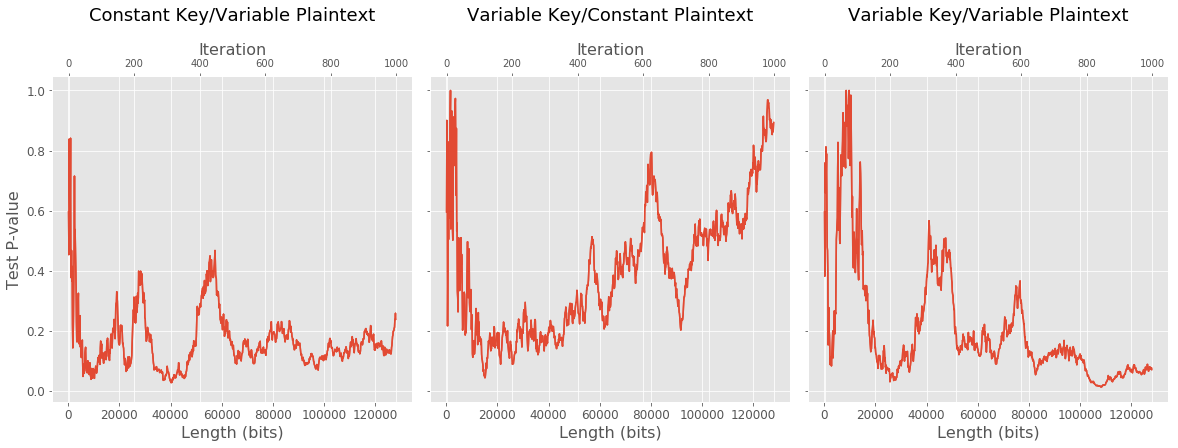

In [148]:
PlotResults(NIST1_CK,NIST1_CP,NIST1_RR)

As noted when first describing the NIST Randomness Test Suite, the desired p-value results is anything above 0.01.  This would mean any downward trends toward zero would indicate that the method producing the bit string is produces bits in a non-random fashion.  In the above charts, we see all scenarios end at a p-value that would be considered random.  There is the appearance that a downward trend is occurring in the variable key/variable plaintext scenario, however, the bit string levels out at about 0.05-0.10 which is still considered random.

<h4> Analysis: NIST Randomness Test 2 </h4>  

Executing the frequency test within a block on each ciphertext bank scenario and then plotting the results.

In [149]:
NIST2_CK = TestOutputNIST(ciphertext_bank_stream_CK,'2')

In [150]:
NIST2_CP = TestOutputNIST(ciphertext_bank_stream_CP,'2')

In [151]:
NIST2_RR = TestOutputNIST(ciphertext_bank_stream_RR,'2')

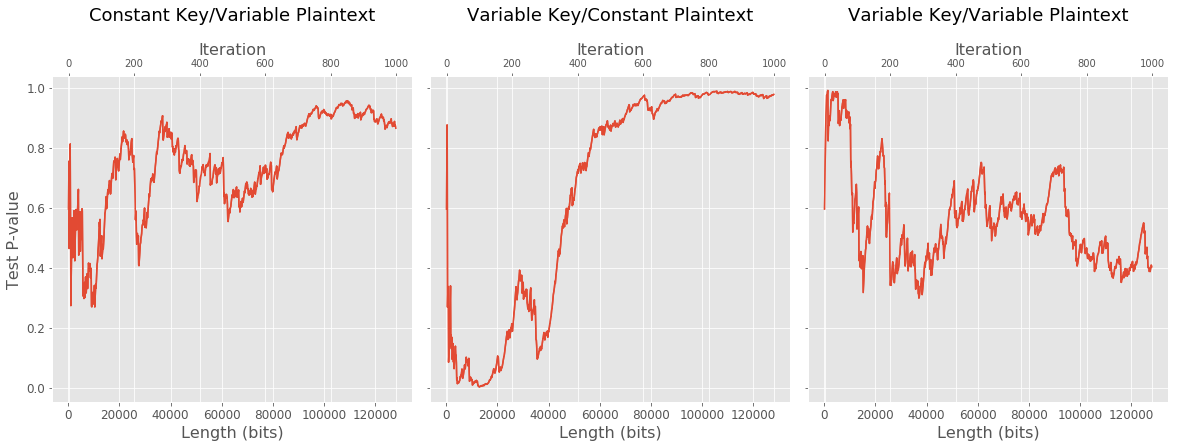

In [152]:
PlotResults(NIST2_CK,NIST2_CP,NIST2_RR)

All three scenarios in the above charts show random bit strings in accordance to the frequency test within a block.  There is no steep downward trends towards zero as the bit string lengths get larger and larger.

<h4> NIST Randomness Test Suite Summary </h4>  

Now that all scenarios have been tested for the frequency (monobit) test and the frequency test within a block, we will conduct the rest of the fifteen tests on each scenario using the summary function that was previously defined.  After testing all available NIST tests, we will determine which specific tests and which specific scenarios need to be investigated further based on the results.  Since we are looking for not only non-random p-values, but also trends towards non-random p-values, any results relatively close to the 0.01 threshold will be plotted to view if there is a consistent trend towards 0.01 or if it is simply an anomaly.  The cut-off value we will use is anything under 0.10.

In [609]:
NIST_Summary_CK = TestAllNIST(ciphertext_bank_stream_CK[-1])

In [610]:
NIST_Summary_CP = TestAllNIST(ciphertext_bank_stream_CP[-1])

In [611]:
NIST_Summary_RR = TestAllNIST(ciphertext_bank_stream_RR[-1])

*Constant Key/Variable Plaintext*

In [615]:
Test = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
dict(zip(Test,NIST_Summary_CK))

{1: 0.23818884632901338,
 2: 0.86493047722218519,
 3: 0.33434025922699118,
 4: 0.0096632450286555753,
 5: 0.64423936615994748,
 6: 0.6443034579265754,
 7: 0.802828998445688,
 8: 0.73352043376311626,
 9: (0.066285462857413893, 0.57099214149165),
 10: 0.068248535725128928,
 11: [0.83112424255492134, 0.74716238712813898],
 12: 0.78938867107199351,
 13: [0.21973193273917388, 0.42065091796898002],
 14: [0.87125578453295616,
  0.84950255149250498,
  0.65382714306032719,
  0.67628098347946108,
  0.43494302874057911,
  0.45777478040131725,
  0.26804350770130958,
  0.075252495815051015],
 15: [0.53634666443555279,
  0.64858219356962366,
  1.0,
  0.95284757656495267,
  0.51329192530328971,
  0.23562273129950506,
  0.095631733290791346,
  0.1742313882480252,
  1.0,
  1.0,
  0.30817954746705412,
  0.065501214256931159,
  0.01444018299689381,
  0.022136264629263672,
  0.066792395642756353,
  0.056942878060602165,
  0.076345784561241442,
  0.16777474632776779]}

Based on the summary results, NIST Randomness Test 4 (Test for Longest-Run-of-Ones in a Block) was the only test that recorded a non-random p-value.  Other tests the generates a low p-value triggering further investigation is Test 9 (Maurer's "Universal Statistical" Test), Test 10 (Linear Complexity Test), and series of states in both Test 14 (Random Excursions Test) and Test 15 (Random Excursions Variant Test).  More specifically state x=4 in Test 14 and states x=-3, 3, 4, 5, 6, 7, 8 in Test 15.

*Variable Key/Constant Plaintext*

In [617]:
dict(zip(Test,NIST_Summary_CP))

{1: 0.89327283014221182,
 2: 0.97750139394763769,
 3: 0.69966546585653511,
 4: 0.01476713564124443,
 5: 0.12489293423400831,
 6: 0.70042866191073072,
 7: 0.21857423402532378,
 8: 0.39481149434459084,
 9: (0.015394101354169444, 0.57099214149165),
 10: 0.50387978615488227,
 11: [0.14380904943053613, 0.32131405430008364],
 12: 0.13046063897173607,
 13: [0.55642547438274725, 0.67778860243342165],
 14: [0.56887696482512118,
  0.93351608031141609,
  0.74887382356700671,
  0.49609772248492789,
  0.094833912376626972,
  0.61180148792177436,
  0.71360990942774849,
  0.11346421593236719],
 15: [0.31161377095856291,
  0.42178609260063082,
  0.63787017989794559,
  0.74911913300059529,
  0.68864554465387662,
  0.48713099068786048,
  0.41096752208833609,
  0.56762849926333592,
  0.28884436634648492,
  0.3961439091520742,
  0.62420611476640597,
  0.94957097115110511,
  0.72826107667261164,
  0.7592902583263772,
  0.86456930168674206,
  0.87532924914792198,
  0.60920561327016831,
  0.60690542721795082

Based on the summary results, no test recorded a non-random p-value.  However, a handful of tests generated a low p-value triggering further investigation.  They are Test 4 (Test for Longest-Run-of-Ones in a Block), Test 9 (Maurer's "Universal Statistical" Test), and a single state (state x=1) for Test 14 (Random Excursions Test).

*Variable Key/Variable Plaintext*

In [618]:
dict(zip(Test,NIST_Summary_RR))

{1: 0.070976951821933892,
 2: 0.40307506381006941,
 3: 0.21797286413711014,
 4: 0.58906899338825158,
 5: 0.18236679345242507,
 6: 0.55523251676494378,
 7: 0.09146728527434074,
 8: 0.96816489052340682,
 9: (0.41092917810511032, 0.57099214149165),
 10: 0.90206401922504831,
 11: [0.85809899712386595, 0.92256762874682152],
 12: 0.41907723217079257,
 13: [0.040690353872457161, 0.0691871164384259],
 14: [0.088117318554539331,
  0.83260049808565184,
  0.7181150737183194,
  0.91371721572906961,
  0.63788550899229091,
  0.95637268640828099,
  0.0022042402144366608,
  0.10384658215010703],
 15: [0.35386449421776744,
  0.46209144705115046,
  0.78696985677683506,
  0.98196995745629878,
  0.92039389819964057,
  0.97739924478188533,
  0.91989956968843423,
  0.93103043148769604,
  0.70783461813122694,
  0.70783461813122694,
  0.54462150231085249,
  0.61510409040198266,
  0.86502758782054667,
  0.59981109843920888,
  0.41589000814720023,
  0.16367604188375917,
  0.10402683558047786,
  0.12229809707004

Based on the summary results, only one state in Test 14 (Random Excursions Test; state x=3) recorded a non-random p-value. In addition, a handful of tests generated low p-values triggering further investigation. They are Test 7 (Non-overlapping Template Matching Test), Test 13 (Cumulative Sums Test) for both forward and backward mode, and another state (state x=-4) for Test 14 (Random Excursions Test).  We will exclude Test 1 from the list to further investigate since we previously plotted the results.

<h3> Further Investigation </h3>  

The the constant key/variable plaintext and variable key/constant plaintext scenario results produces overlapping tests that required further investigation.  Rather than plotting these tests results separately for each scenario, as will be done later in the notebook, we will plot Test 4 (Test for Longest-Run-of-Ones) and Test 9 (Maurer's "Statistical Universal" Test) together.

<h4> NIST Randomness Test 4 Analysis </h4>  

Executing the Test for Longest-Run-of-Ones in a Block on each ciphertext bank scenario and then plotting the results.

In [158]:
NIST4_CK = TestOutputNIST(ciphertext_bank_stream_CK,'4')

In [159]:
NIST4_CP = TestOutputNIST(ciphertext_bank_stream_CP,'4')

In [160]:
NIST4_RR = TestOutputNIST(ciphertext_bank_stream_RR,'4')

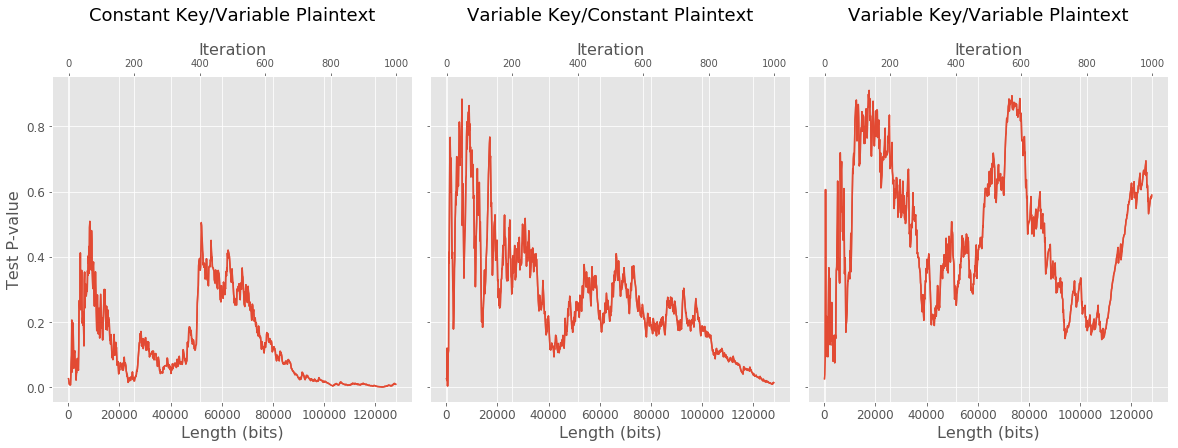

In [161]:
PlotResults(NIST4_CK,NIST4_CP,NIST4_RR)

Both Constant Key/Variable Plaintext and Variable Key/Constant Plaintext show a sharp decline down towards zero as more ciphertext blocks are made and appended to eachother.  This suggests evidence that in these two scenarios, the ciphertext blocks being generated are non-random.

<h4> Analysis: NIST Randomness Test 9 </h4>  

Executing the Test for Longest-Run-of-Ones in a Block on each ciphertext bank scenario and then plotting the results.  

Due to the nature of the settings selected for the Maurer's "Universal Statistical" Test we must skip through the first 50 iterations of our ciphertext blocks since there is a minimum bit string length required to generate a numeric p-value.

In [620]:
NIST9_CK = TestOutputNIST(ciphertext_bank_stream_CK[50:],'9')

In [625]:
NIST9_CK = [test[0] for test in NIST9_CK]
NIST9_CK = [0]*50 + NIST9_CK

In [622]:
NIST9_CP = TestOutputNIST(ciphertext_bank_stream_CP[50:],'9')

In [630]:
NIST9_CP = [test[0] for test in NIST9_CP]
NIST9_CP = [0]*50 + NIST9_CP

In [624]:
NIST9_RR = TestOutputNIST(ciphertext_bank_stream_RR[50:],'9')

In [631]:
NIST9_RR = [test[0] for test in NIST9_RR]
NIST9_RR = [0]*50 + NIST9_RR

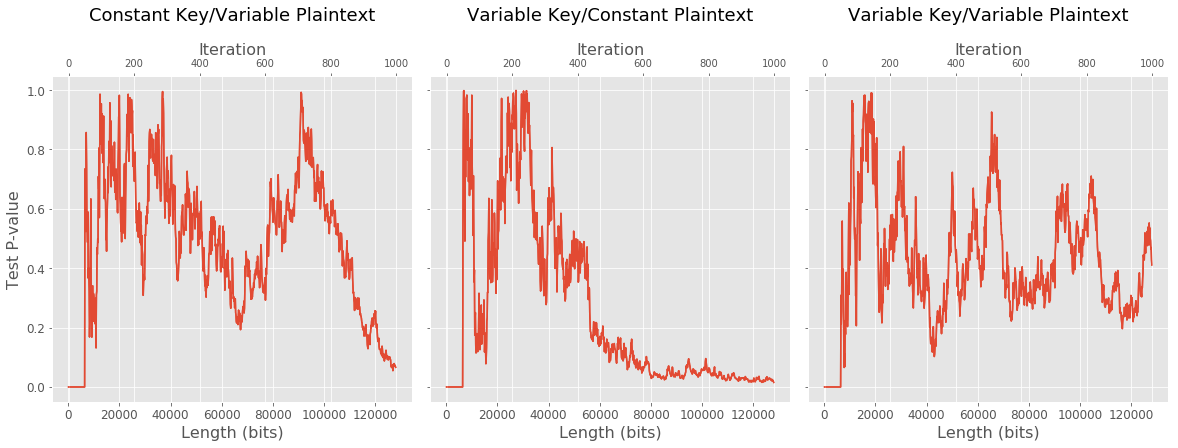

In [632]:
PlotResults(NIST9_CK,NIST9_CP,NIST9_RR)

Again, as observed in Test 4, we witness a sharp decline in both constant key/variable plaintext and variable plaintext/constant key scenarios as our bit strings get longer and longer.  This adds additional evidence that the two scenarios are generating non-random ciphertext blocks.

<h3> Individual Plot Method </h3>  

Now that we are moving on to deep diving more specifically to a particular test for a particular scenario.  A function has been made to plot test results individually.  The function is almost indentical to the plotting function previously define with the exception that is is generating one plot rather than three.

In [642]:
def PlotSingleResult(NIST_Test):
    
    f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(12,6))
    length1 = range(128,len(NIST_Test)*128+1,128)
    
    ax1.plot(length1, NIST_Test)
    ax1.tick_params(labelsize=12)
    ax1.set_ylabel('Test P-value', fontsize=16)
    ax1.set_xlabel('Length (bits)', fontsize=16)
    ax4 = ax1.twiny()
    ax4.plot(NIST_Test)
    ax4.set_xlabel('Iteration', fontsize=16)

<h3> Further Investigation: Constant Key/Variable Plaintext </h3>

<h4> Analysis: NIST Randomness Test 10 </h4>  

Executing the Linear Complexity Test on the constant key/variable plaintext scenario and then plotting the results

In [634]:
NIST10_CK = TestOutputNIST(ciphertext_bank_stream_CK,'10')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

In [ ]:
PlotSingleResult(NIST10_CK)

<h4> Analysis: NIST Randomness Test 14 [state x=4] </h4>  
Executing the Random Excursions Test on the constant key/variable plaintext scenario and then plotting the results for state x=4.

In [644]:
NIST14_CK = TestOutputNIST(ciphertext_bank_stream_CK,'14')

In [645]:
NIST14_CK = [test[7] for test in NIST14_CK]

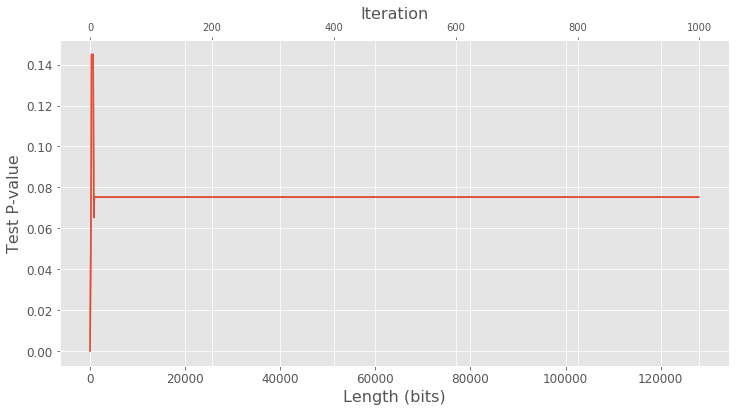

In [646]:
PlotSingleResult(NIST14_CK)

We find an interesting plot where beyond a certain ciphertext bit string length the p-value remains constant for all ciphertext blocks that are appended to it.  Through trial and error, it is found that all plots for both the Random Excursions Test and the Random Excursions Variant Test produce similar plots where the p-value remains constant after a certain point.  Since this is the case, it is safe to assume further investigation is not needed for any of the states in these tests.  No pressence of trends means as long as the final p-value previously generated in the summary sections is considered non-random we can conclude the scenario producing ciphertext is random for that particular test.

<h4> Analysis: NIST Randomness Test 15 [states x=-3, 3, 4, 5, 6, 7, 8] </h4>  

Again, since the final p-values for these states are above the threshold to consider a sequence random, we assume the method producing the ciphertext for that particualar test is random because no trends are present.

<h3> Further Investigation: Variable Key/Constant Plaintext </h3>  

Beyond the two tests previously investigated jointly with the constant key/variable plaintext scenario, the only test below the 0.10 mark was NIST Randomness Test 14 at state x=1.  As previously stated, further investigation is not required since it is determined the test does not produce any linear trend as ciphertext blocks are produced beyond a certain bit string length.

<h3> Further Investigation: Variable Key/Variable Plaintext </h3>

<h4> Analysis: NIST Randomness Test 7 </h4>  

Executing the Non-overlapping Template Matching Test on the variable key/variable plaintext scenario and then plotting the results.

In [652]:
NIST7_RR = TestOutputNIST(ciphertext_bank_stream_RR,'7')

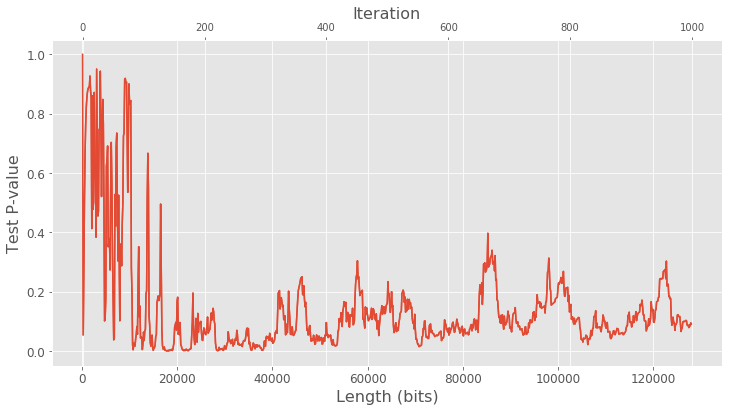

In [654]:
PlotSingleResult(NIST7_RR)

Even though the recorded p-value is low enough to trigger further looking into the plot, the chart appears to produce a rather random trend oscillating about a p-value in the random range.  It appears at iteration 1000 the test produces a p-value in a down swing of the oscillation.  For this reason, we do not see any evidence to suggest the bit string produced in this scenario is non-random for this particular test.

<h4> Analysis: NIST Randomness Test 13 [forward/backward] </h4>  

Executing the Cumulative Sums (Cusums) Test on the variable key/variable plaintext scenario and then plotting the results for both forward mode and backward mode.

In [655]:
NIST13_RR = TestOutputNIST(ciphertext_bank_stream_RR,'13')

In [656]:
NIST13_RR1 = [test[0] for test in NIST13_RR]
NIST13_RR2 = [test[1] for test in NIST13_RR]

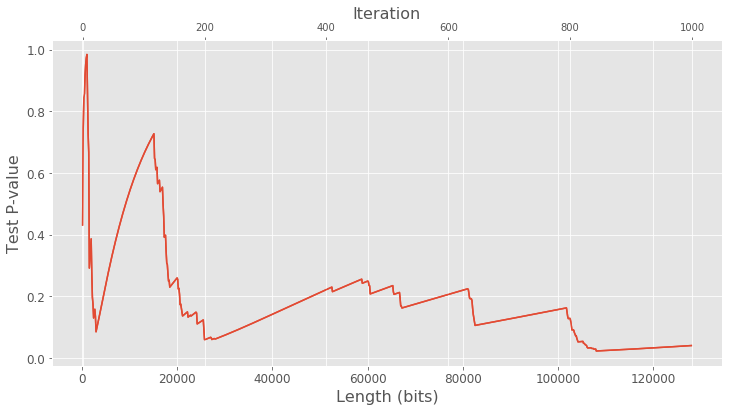

In [657]:
PlotSingleResult(NIST13_RR1)

The forward mode of the Cusums Test produces much steeper peaks and valleys.  After a steep decline, the ciphertext blocks rebound with a steady string of increasing p-values.  At no point, does the the scenario enter a non-random p-value and the trendline apprears to be that of a exponential function where as the bit string length goes to infinity the chart levels out to a p-value in the random threshold.

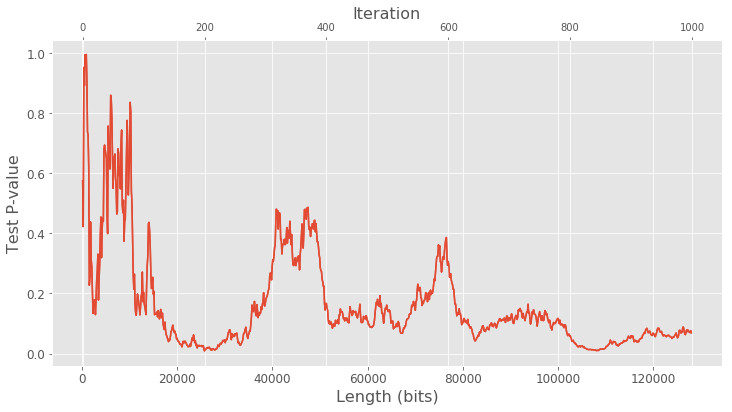

In [658]:
PlotSingleResult(NIST13_RR2)

As observed in Test 7, the plot appears to be oscillating about a random p-value where the oscillation is getting tighter as the bit string length is getting longer.  It appears this p-value is around the 0.10.  For this reason along with a lack of downward trends towards a non-random p-value, there is no evidence to suggest that the method is this particular scenario for this particular test is non-random.

<h4> Analysis: NIST Randomness Test 14 [state x=-4, 3] </h4>  

As previously noted, Test 14 does not show any linear trends beyond a certain bit length.  Therefore, states x=-4, 3 will not be plotted.  However, state x=3 produced a p-value that would be consider the bit string non-random.  It is difficult to determine if this is a substantial piece of evidence or if it is an anomaly based on the fact a trend line does not exist.  Looking at the Randomness Test Suite as a whole, no other test and no other state in this particular test suggest a non-random sequence.  It is worth noting the result but for all extend and purposes, it can be determined that the method in which ciphertext blocks are produced using a variable key and variable plaintext for the AES-128 cipher in ECB mode is random. 

<h3> Conclusions </h3>  

In summary, it is shown that only a single test in the variable key/variable plaintext scenario produced a non-random p-value.  Through investigation it could be determined that this occurrence may in fact be an anomaly.  For the other two scenarios, constant key/variable plaintext and variable key/constant plaintext, however, there is reason to believe the method in which ciphertext was produced is non-random.  Evidence backing this claim stems from the results of NIST Randomness Test 4: Tests for the Longest-Run-of-Ones in a Block and NIST Randomness Test 9: Maurer's "Universal Statistical" Test.  In both tests for both scenarios, steep downward trends were found as more ciphertext blocks were appended to each other and bit strings tested grew in length.  And in one case, NIST Randomness Test 4 for constant key/variable plaintext, declined to the point of producing non-random p-values.  

These results make practical sense based on the notion that ECB mode was used in implementing the AES-128 cipher.  ECB, Electronic Codebook, has been noted for containing potential vulnerabilities when messages are large in length.  Highly structured messages have the potential to be exploited through finding patterns which a cryptanalyst can begin to determine plaintext-ciphertext pairs<sup>[11]</sup>.  In both scenarios where randomness is in question, there is consistent structure provided.  Constant plaintext establishes a vulnerable structure where known plaintext can be found.  And constant keys in junction with non-uniform plaintext frequency (alphabetic letters selected at a frequency used in the English language) establishes a vulnerable structure since if the same b-bit block appears in plaintext it will produce the same ciphertext<sup>[11[</sup>.  

Delving into the minute details of the AES-128 using ECB mode could providing reasoning for the results that were observed for NIST Randomness Test 4 and 9.  This topic of discussion can be potential future work for researchers and the study can be built upon the base established in this notebook. 

<h3>References</h3>  

<sup>[1]</sup> https://inventwithpython.com/hacking/chapter20.html  
<sup>[2]</sup> https://stackoverflow.com/questions/4113307/pythonic-way-to-select-list-elements-with-different-probability  
<sup>[3]</sup> https://docs.python.org/3/library/codec.html#standard-encodings  
<sup>[4]</sup> https://stackoverflow.com/questions/1425493/convert-hex-to-binary  
<sup>[5]</sup> https://docs.python.org/3/library/os.html  
<sup>[6]</sup> https://www.dlitz.net/software/pycrypto/api/2.6/  
<sup>[7]</sup> https://csrc.nist.gov/csrc/media/publications/fips/197/final/documents/fips-197.pdf  
<sup>[8]</sup> https://csrc.nist.gov/Projects/Random-Bit-Generation     
<sup>[9]</sup> http://nvlpubs.nist.gov/nistpubs/Legacy/SP/nistspecialpublication800-22r1a.pdf  
<sup>[10]</sup> https://gerhardt.ch/random.php  
<sup>[11]</sup> "Cryptography and Network Security - Principals and Practice", Sixth Edition by W. Stallings (2014)